In [2]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from numpy.random import RandomState
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [3]:
#load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

# Data Exploration
Let's take a peek into the data and explore the data and its variables. The dataset is a supervised learning dataset with over 12000 instances and 26 attributes; this mean there is an input variable X and an out variable y.  

In [4]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#let's look at the data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

It seems that the data has some few numberical datatypes and the rest are string objects, however all the data can be categorized as being categorical datatypes with a mix of binary and ordinal datatypes.

In [6]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

# Cleaning The Data

In [7]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

There are some missing values in several columns, and the 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [8]:
df["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [9]:
df.drop('car', inplace=True, axis=1)

Empty values in categorical data can be removed or replaced with the most frequent value in each column.

Lets iterate through the pandas table and get all the columns with empty or NaN values, and then for each column the code is going to find the largest variable count and fill the empty values with the corresponding variable with maximum count.

In [10]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

In [11]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [12]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column. 

In [14]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

Let's plot the distribution charts of all the categorical datatypes.

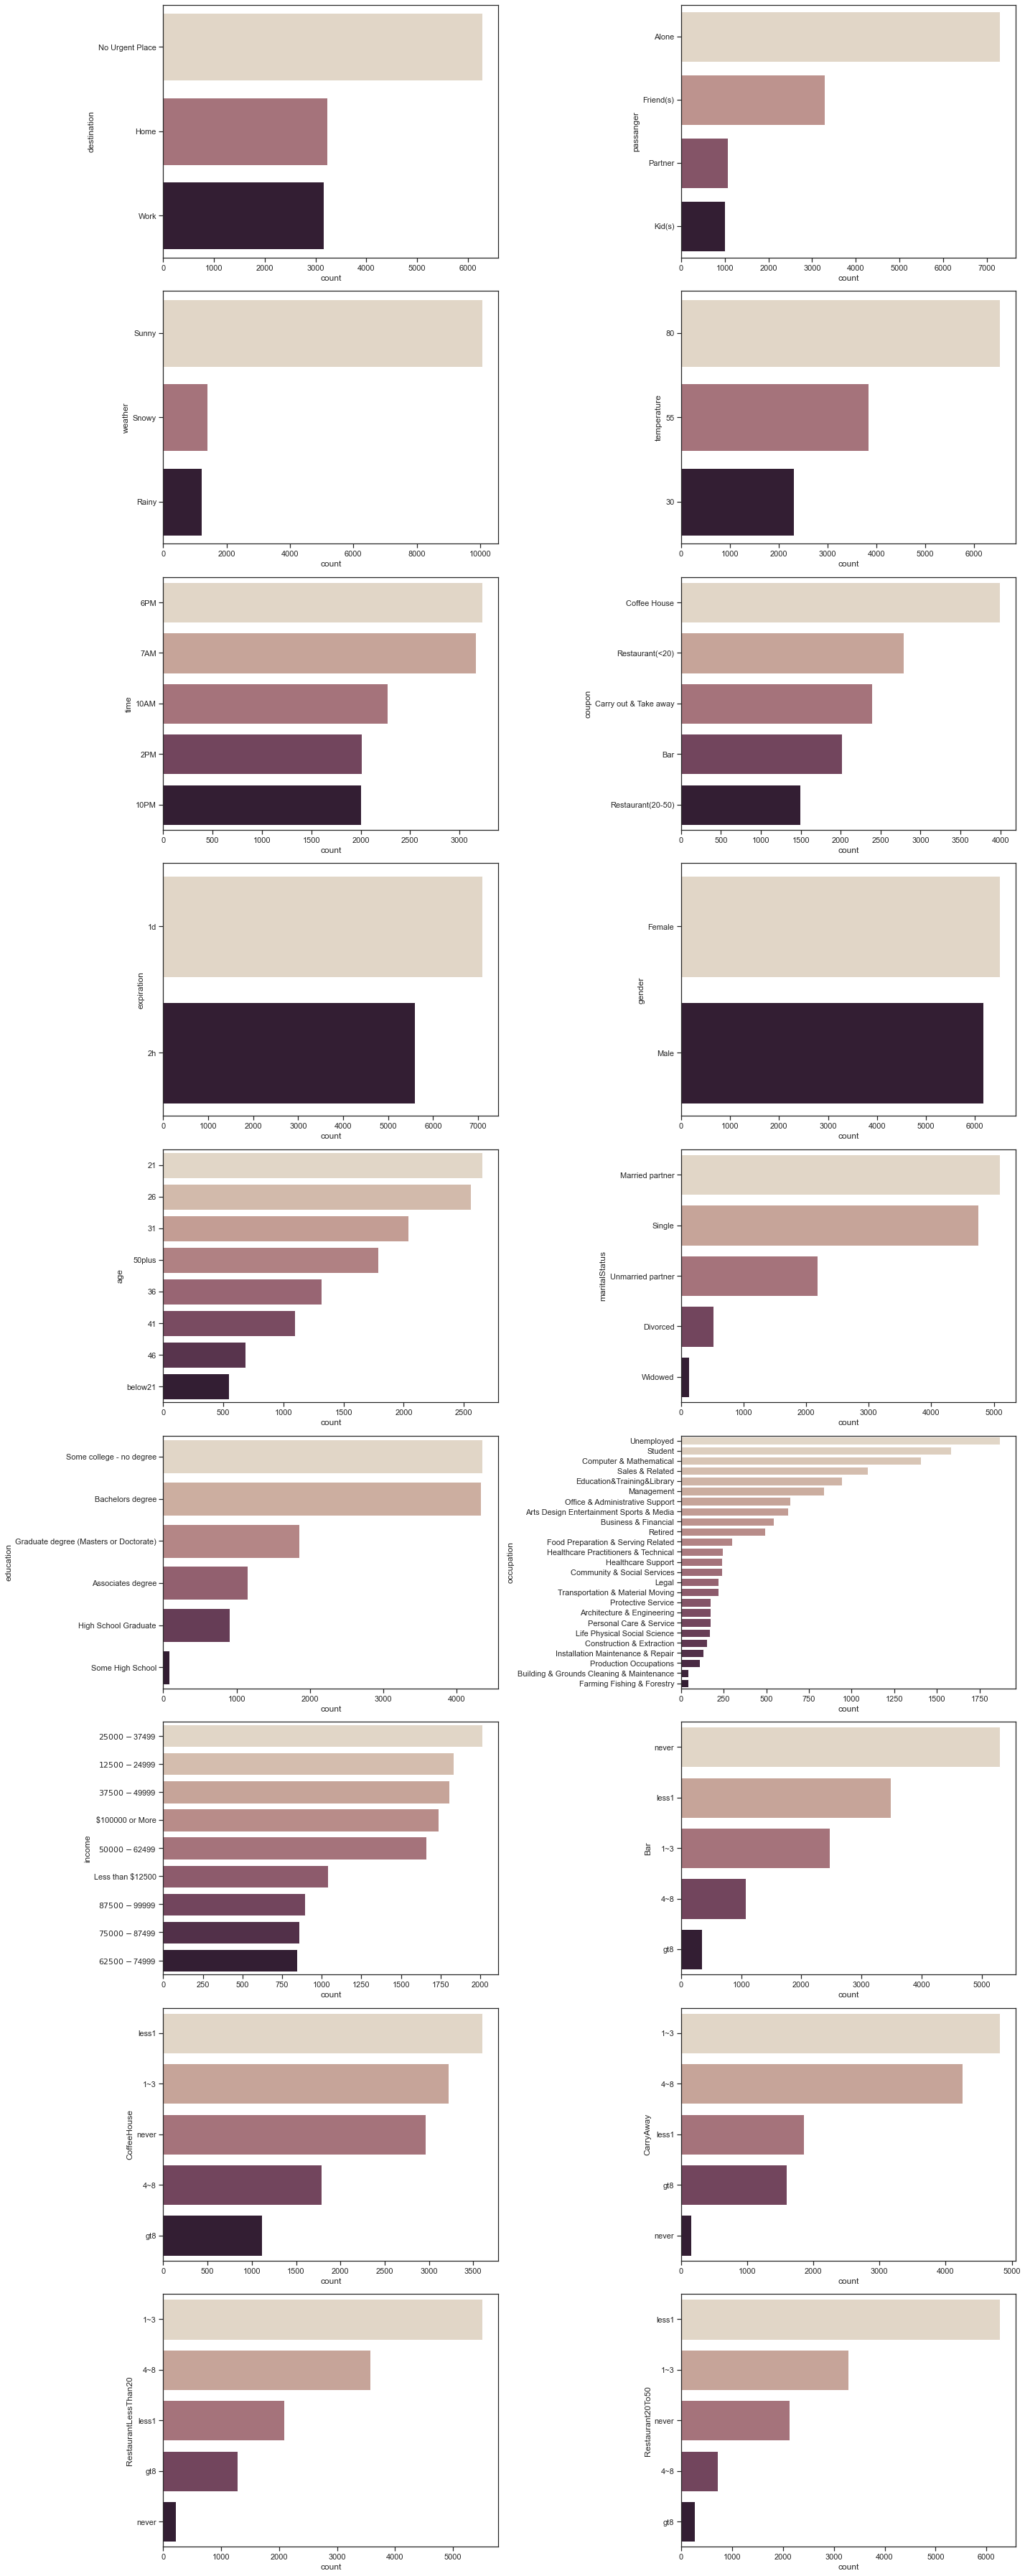

In [15]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

We are going to create feature vectors for our modeling by using the LabelEnconder and OneHotEncoder.

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    df_enc = pd.concat([df_enc,df0], axis=1)
    
df_final = pd.concat([df_enc, df_int], axis=1)

#source: https://pbpython.com/categorical-encoding.html

In [17]:
df_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


# Data Modeling

In [41]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
#split data into training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=.3, random_state=42, shuffle=True, stratify=df_final['Y'])

In [43]:
#Creating the Dependent Feature Matrix
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

#Creating the Independent Vector
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

## Decision Tree

In [45]:
DTC = DecisionTreeClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(X_test)
score_DTC = DTC.score(X_test, y_test)

print('The accuracy of the Decision tree model is ',score_DTC)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred_DTC, target_names=targets))

#calculate RMSE
print('RMSE =', sqrt(mean_squared_error(y_test, y_pred_DTC))) 

The accuracy of the Decision tree model is  0.6875985286389911
              precision    recall  f1-score   support

       <=50k       0.64      0.62      0.63      1643
        >50k       0.72      0.74      0.73      2163

    accuracy                           0.69      3806
   macro avg       0.68      0.68      0.68      3806
weighted avg       0.69      0.69      0.69      3806

RMSE = 0.5589288607336438


# Random Forest

In [46]:
RF = RandomForestClassifier().fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)
score_RF = RF.score(X_test,y_test)

print('The accuracy of the Random Forest Model is', score_RF)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred_RF,target_names=targets))

print('RMSE =', sqrt(mean_squared_error(y_test, y_pred_DTC)))

The accuracy of the Random Forest Model is 0.7419863373620599
              precision    recall  f1-score   support

       <=50k       0.73      0.64      0.68      1643
        >50k       0.75      0.82      0.78      2163

    accuracy                           0.74      3806
   macro avg       0.74      0.73      0.73      3806
weighted avg       0.74      0.74      0.74      3806

RMSE = 0.5589288607336438


In [23]:
from sklearn.metrics import confusion_matrix

cm_DTC = confusion_matrix(y_test,y_pred_DTC)
pd.crosstab(y_test, y_pred_DTC, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,1030,613,1643
1,587,1576,2163
All,1617,2189,3806


In [24]:
from sklearn.metrics import confusion_matrix

cm_RF = confusion_matrix(y_test,y_pred_RF)
pd.crosstab(y_test, y_pred_RF, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,1053,590,1643
1,383,1780,2163
All,1436,2370,3806


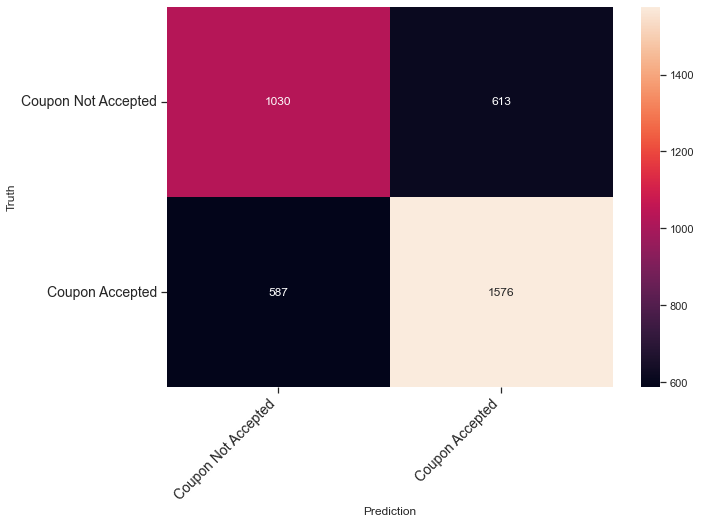

In [25]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_DTC,["Coupon Not Accepted", "Coupon Accepted"])

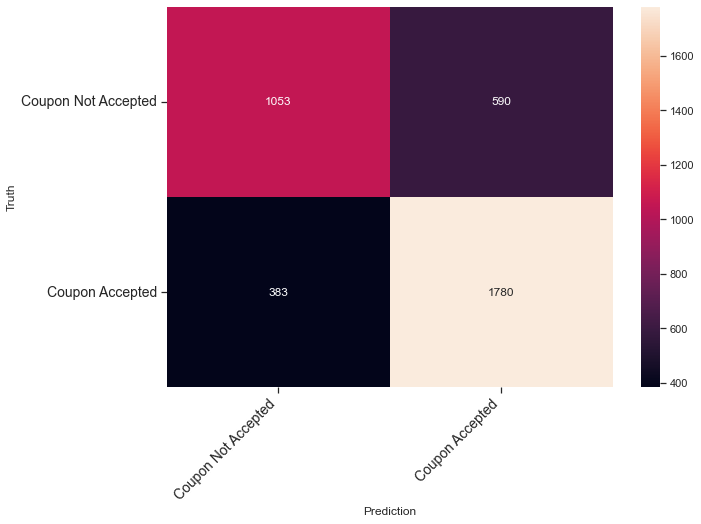

In [26]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_RF,["Coupon Not Accepted", "Coupon Accepted"])

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

From our train and test data, we already know that our test data consisted of 3806 data points. That is the 3rd row and 3rd column value at the end. We also notice that there are some actual and predicted values. The actual values are the number of data points that were originally categorized into 0 or 1. The predicted values are the number of data points SVM model predicted as 0 or 1.<br>

The actual values are:
<ul>
    <li>The drivers who actually did not use a coupon = 1643</li>
    <li>The drivers who actually did use a coupon = 2163</li>
</ul><br>
The predicted values are:
<ul>
    <li>Number of drivers who were predicted as not using a coupon = 1401
    <li>Number of drivers who were predicted as using a coupon = 2396
</ul>

All the values we obtain above have a term. Let’s go over them one by one:
<ol>
    <li>The cases in which the drivers actually did not use a coupon and our model also predicted as not using one is called the <b>True Negatives</b>. For our matrix, True Negatives = 1056.
    <li>The cases in which the drivers actually used a coupon and our model also predicted as using one are called the <b>True Positives</b>. For our matrix, True Positives = 1809
    <li>However, there are are some cases where the drivers actually did not use a coupon, but our model has predicted that they did use one. This kind of error is the <b>Type I Error</b> and we call the values as <b>False Positives</b>. For our matrix, False Positives = 587
    <li>Similarly, there are are some cases where the drivers actually used a coupon, but our model has predicted that they did not use one. This kind of error is the <b>Type II Error</b> and we call the values as <b>False Negatives</b>.  For our matrix, False Negatives = 354
</ol>

## ROC Curves(Receiver Operating Characteristic Curve)

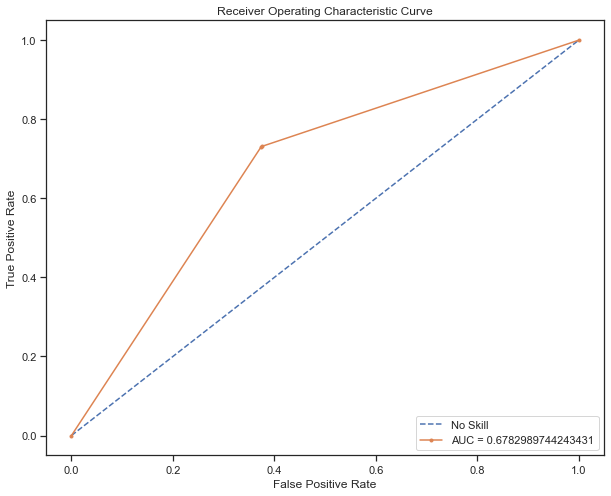

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = DTC.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

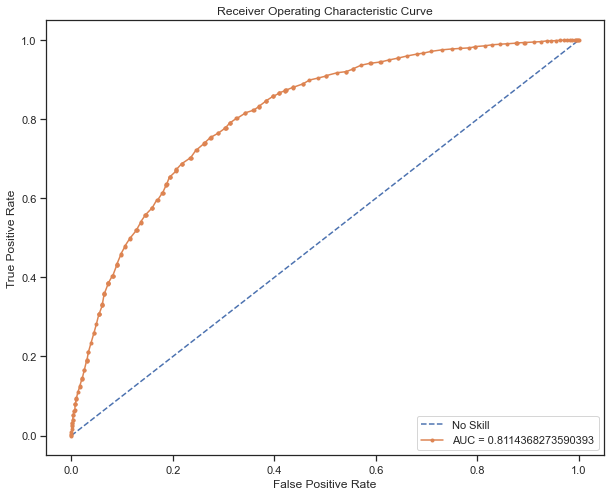

In [28]:
y_pred_proba = RF.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

## Precision-Recall Curve (PRC)

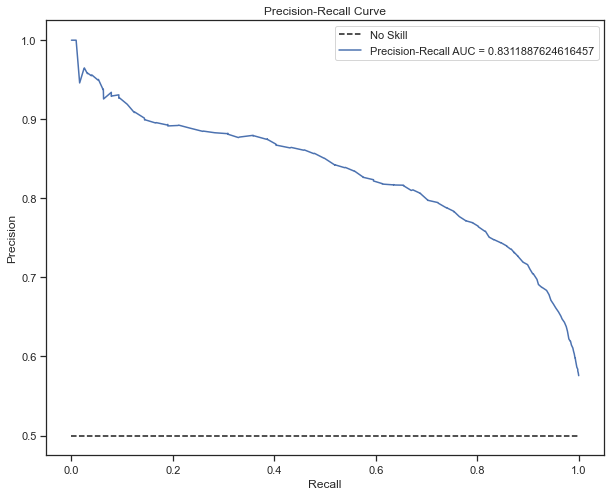

In [29]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

<ul>
<li>At the lowest point (0,0), the threshold is set to 1 which means the model make no distinctions between drivers who use coupons and drivers who do not use coupons.
<li>The highest point (1,1), the threshold is set at 0 which means that both precision and recall are high and the model makes distinctions perfectly. 
<li>The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.
<li>Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1.Therefore, we should aim for a high value of AUC.
</ul>